In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")
# Set to display all the columns in dataset
pd.set_option("display.max_columns", None)
# Import psql to run queries 
import pandasql as psql

In [2]:
# Load the dataset
CDdata=pd.read_csv(r"C:\Users\Dlc\Downloads\clean_data.csv",header=0)
CDdata_BK=CDdata.copy()
CDdata.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
#retrieve the information
CDdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [ ]:
#finding the shape of the dataset
CDdata.shape

In [4]:
#finding unique values
CDdata.nunique()

ID                 9709
Gender                2
Own_car               2
Own_property          2
Work_phone            2
Phone                 2
Email                 2
Unemployed            2
Num_children          9
Num_family           10
Account_length       61
Total_income        263
Age                7172
Years_employed     3637
Income_type           5
Education_type        5
Family_status         5
Housing_type          6
Occupation_type      19
Target                2
dtype: int64

In [5]:
#finding the null values id=f any
CDdata.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [6]:
#finding duplicate values
CDdata_dup=CDdata[CDdata.duplicated(keep='last')]
CDdata_dup

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target


In [7]:
CDdata.duplicated().any()

False

In [31]:
CDdata['Target'].value_counts()

0    8426
1    1283
Name: Target, dtype: int64

In [8]:
#count the target or dependent variable by '0' & '1' and their proportion
#(>=10:1,then the dataset is imbalance data)
Target_count=CDdata.Target.value_counts()
print("class 0:",Target_count[0])
print("class 1:",Target_count[1])
print('Proportion:',round(Target_count[0]/Target_count[1],2),':1')
print('Total Bank records:',len(CDdata))

class 0: 8426
class 1: 1283
Proportion: 6.57 :1
Total Bank records: 9709


In [9]:
CDdata['Income_type'].value_counts()

Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: Income_type, dtype: int64

In [10]:
# label encoder #the label encoder to handle the cateorical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
CDdata['Income_type']=LE.fit_transform(CDdata[['Income_type']])
CDdata['Education_type']=LE.fit_transform(CDdata[['Education_type']])
CDdata['Family_status']=LE.fit_transform(CDdata[['Family_status']])
CDdata['Housing_type']=LE.fit_transform(CDdata[['Housing_type']])
CDdata['Occupation_type']=LE.fit_transform(CDdata[['Occupation_type']])

In [11]:
CDdata['Income_type'].value_counts()

4    4960
0    2312
1    1712
2     722
3       3
Name: Income_type, dtype: int64

In [12]:
CDdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   int64  
 15  Education_type   9709 non-null   int32  
 16  Family_status    9709 non-null   int32  
 17  Housing_type  

In [13]:
#to delete  the variable which does not influcence the target variable
del CDdata['ID']

In [14]:
#splitting the data as train data and test data
IndepVar=[]
for col in CDdata.columns:
    if col!='Target':
        IndepVar.append(col)
TargetVar='Target'
x=CDdata[IndepVar]
y=CDdata[TargetVar]

In [15]:
#identifying the variables effecting target variable
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((6796, 18), (2913, 18), (6796,), (2913,))

In [16]:
#identifying the variables effecting target variable
col=['Num_children','Num_family','Account_length','Total_income','Age','Years_employed','Income_type','Education_type','Family_status','Housing_type','Occupation_type']

In [17]:
#scaling techinique

from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[col]=mmscaler.fit_transform(x_train[col])
x_train=pd.DataFrame(x_train)
x_test[col]=mmscaler.fit_transform(x_test[col])
x_test=pd.DataFrame(x_test)


# SVM Algorithm

In [18]:
#Loading the result SVM set
SVM_Results=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults.csv",header=0)
SVM_Results_bk=SVM_Results.copy()
SVM_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVM - Linear
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


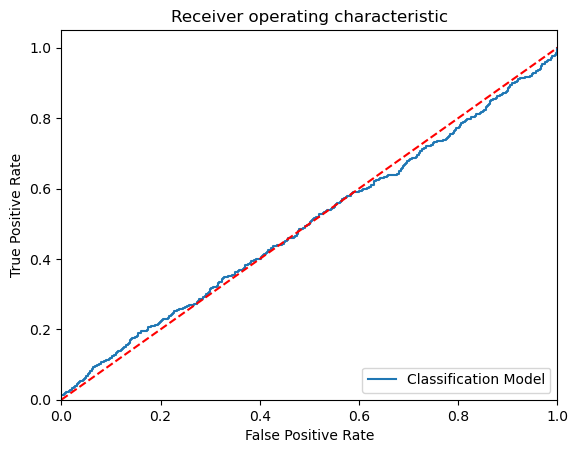

-----------------------------------------------------------------------------------------------------


In [19]:
#1.Linear
# Bild SVM Model

# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM = ModelSVM.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM.predict(x_test)
y_pred_prob = ModelSVM.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVM_Results = SVM_Results.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------




Model Name:  SVM - Polynominal
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


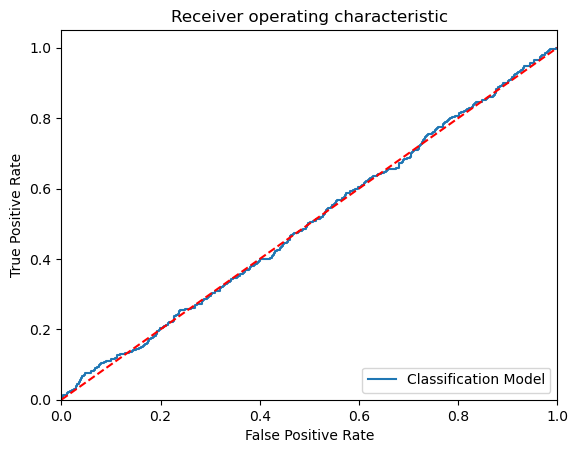

-----------------------------------------------------------------------------------------------------


In [20]:
#2 Polynomial
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVM_Results = SVM_Results.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 184  230]
 [1032 1467]]
Outcome values : 
 184 230 1032 1467
Classification report : 
               precision    recall  f1-score   support

           1       0.15      0.44      0.23       414
           0       0.86      0.59      0.70      2499

    accuracy                           0.57      2913
   macro avg       0.51      0.52      0.46      2913
weighted avg       0.76      0.57      0.63      2913

Accuracy : 56.7 %
Precision : 15.1 %
Recall : 44.4 %
F1 Score : 0.226
Specificity or True Negative Rate : 58.7 %
Balanced Accuracy : 51.6 %
MCC : 0.022
roc_auc_score: 0.516


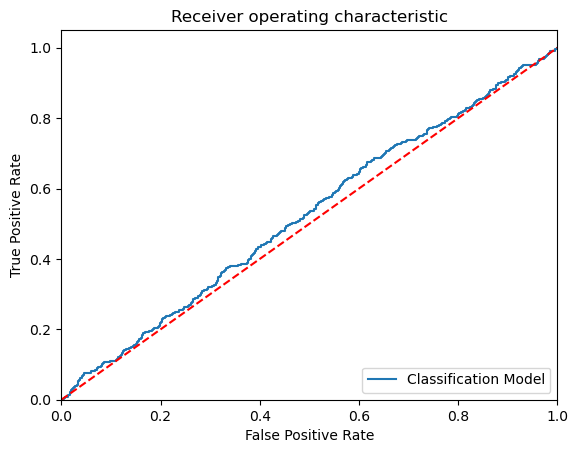

-----------------------------------------------------------------------------------------------------


In [21]:
#3.Gaussian
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVM_Results = SVM_Results.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 202  212]
 [1216 1283]]
Outcome values : 
 202 212 1216 1283
Classification report : 
               precision    recall  f1-score   support

           1       0.14      0.49      0.22       414
           0       0.86      0.51      0.64      2499

    accuracy                           0.51      2913
   macro avg       0.50      0.50      0.43      2913
weighted avg       0.76      0.51      0.58      2913

Accuracy : 51.0 %
Precision : 14.2 %
Recall : 48.8 %
F1 Score : 0.221
Specificity or True Negative Rate : 51.3 %
Balanced Accuracy : 50.0 %
MCC : 0.001
roc_auc_score: 0.501


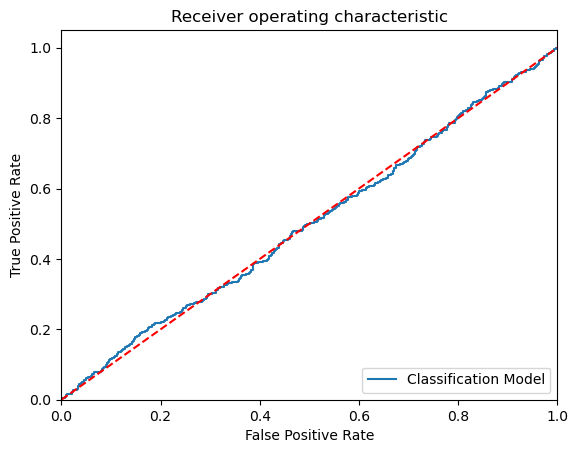

-----------------------------------------------------------------------------------------------------


In [22]:
#4.Sigmoid
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVM_Results = SVM_Results.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [23]:
#to dispaly SVM results
SVM_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,414,0,2499,0.858,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynominal,0,414,0,2499,0.858,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
2,SVM - Gaussian,184,230,1032,1467,0.567,0.151,0.444,0.226,0.587,0.022,0.515740,0.516
3,SVM - Sigmoid,202,212,1216,1283,0.510,0.142,0.488,0.221,0.513,0.001,0.500664,0.500


# KNN algorithm

In [24]:
#load the dataset to store KNN results
KNN_Results=pd.read_csv(r"C:\Users\Dlc\Downloads\KNN_Results.csv",header=0)
KNN_Results_bk=KNN_Results.copy()
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[  55  359]
 [ 304 2195]]
Outcome values : 
 55 359 304 2195
Classification report : 
               precision    recall  f1-score   support

           1       0.15      0.13      0.14       414
           0       0.86      0.88      0.87      2499

    accuracy                           0.77      2913
   macro avg       0.51      0.51      0.51      2913
weighted avg       0.76      0.77      0.77      2913

Accuracy : 77.2 %
Precision : 15.3 %
Recall : 13.3 %
F1 Score : 0.142
Specificity or True Negative Rate : 87.8 %
Balanced Accuracy : 50.6 %
MCC : 0.012
roc_auc_score: 0.506


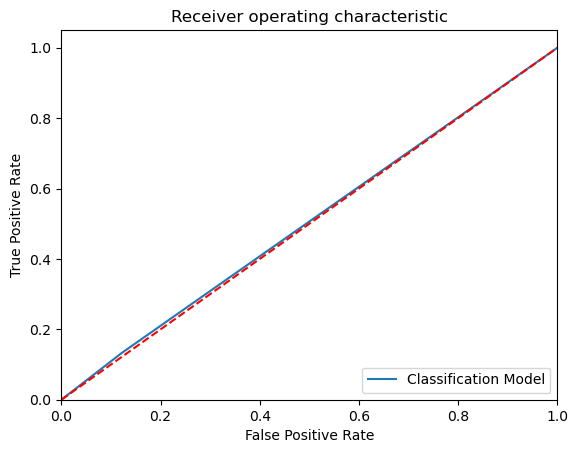

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[   6  408]
 [  40 2459]]
Outcome values : 
 6 408 40 2459
Classification report : 
               precision    recall  f1-score   support

           1       0.13      0.01      0.03       414
           0       0.86      0.98      0.92      2499

    accuracy                           0.85      2913
   macro avg       0.49      0.50      0.47      2913
weighted avg       0.75      0.85      0.79      2913

Accuracy : 84.6 %
Precision : 13.0 %
Recall : 1.4 %
F1 Score : 0.026
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 49.9 %
MCC : -0.004
roc_auc_score: 0.499


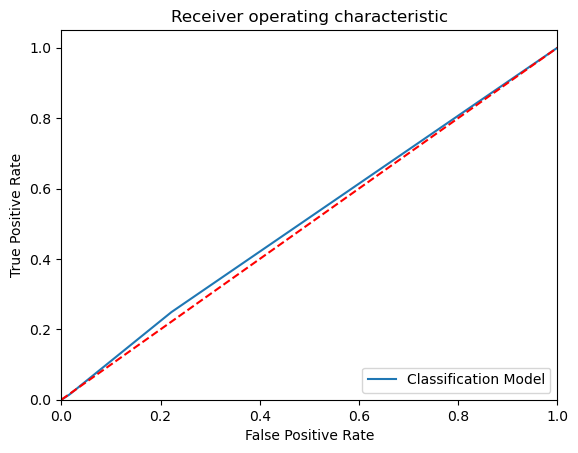

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[  25  389]
 [ 105 2394]]
Outcome values : 
 25 389 105 2394
Classification report : 
               precision    recall  f1-score   support

           1       0.19      0.06      0.09       414
           0       0.86      0.96      0.91      2499

    accuracy                           0.83      2913
   macro avg       0.53      0.51      0.50      2913
weighted avg       0.77      0.83      0.79      2913

Accuracy : 83.0 %
Precision : 19.2 %
Recall : 6.0 %
F1 Score : 0.092
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 50.9 %
MCC : 0.031
roc_auc_score: 0.509


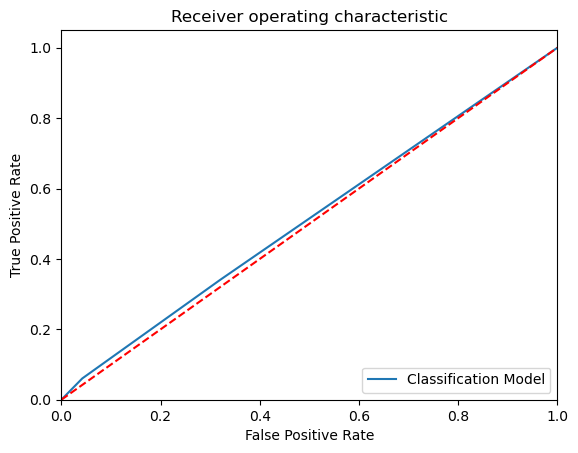

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[   4  410]
 [  17 2482]]
Outcome values : 
 4 410 17 2482
Classification report : 
               precision    recall  f1-score   support

           1       0.19      0.01      0.02       414
           0       0.86      0.99      0.92      2499

    accuracy                           0.85      2913
   macro avg       0.52      0.50      0.47      2913
weighted avg       0.76      0.85      0.79      2913

Accuracy : 85.3 %
Precision : 19.0 %
Recall : 1.0 %
F1 Score : 0.018
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 50.1 %
MCC : 0.012
roc_auc_score: 0.501


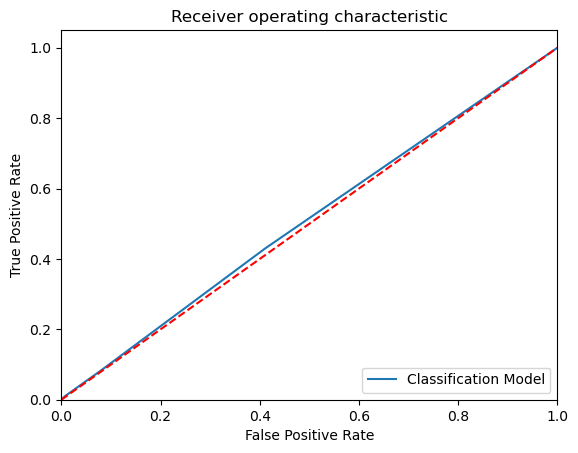

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[   7  407]
 [  40 2459]]
Outcome values : 
 7 407 40 2459
Classification report : 
               precision    recall  f1-score   support

           1       0.15      0.02      0.03       414
           0       0.86      0.98      0.92      2499

    accuracy                           0.85      2913
   macro avg       0.50      0.50      0.47      2913
weighted avg       0.76      0.85      0.79      2913

Accuracy : 84.7 %
Precision : 14.9 %
Recall : 1.7 %
F1 Score : 0.03
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 50.0 %
MCC : 0.002
roc_auc_score: 0.5


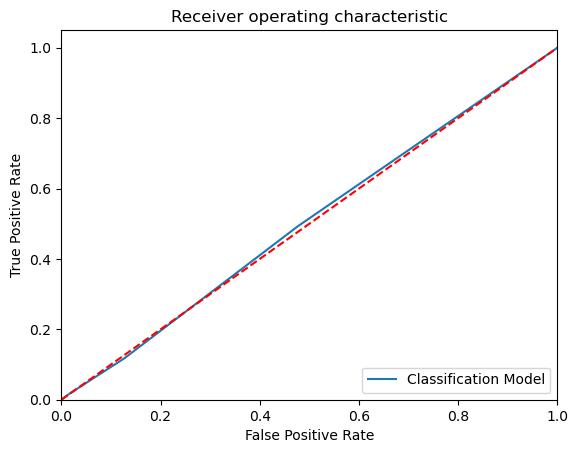

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[   1  413]
 [   3 2496]]
Outcome values : 
 1 413 3 2496
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.55      0.50      0.46      2913
weighted avg       0.77      0.86      0.79      2913

Accuracy : 85.7 %
Precision : 25.0 %
Recall : 0.2 %
F1 Score : 0.005
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : 0.011
roc_auc_score: 0.501


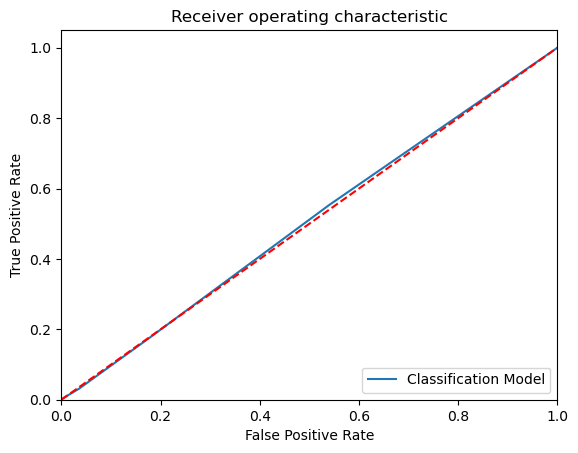

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[   3  411]
 [   9 2490]]
Outcome values : 
 3 411 9 2490
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.01      0.01       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.55      0.50      0.47      2913
weighted avg       0.77      0.86      0.79      2913

Accuracy : 85.6 %
Precision : 25.0 %
Recall : 0.7 %
F1 Score : 0.014
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 50.1 %
MCC : 0.02
roc_auc_score: 0.502


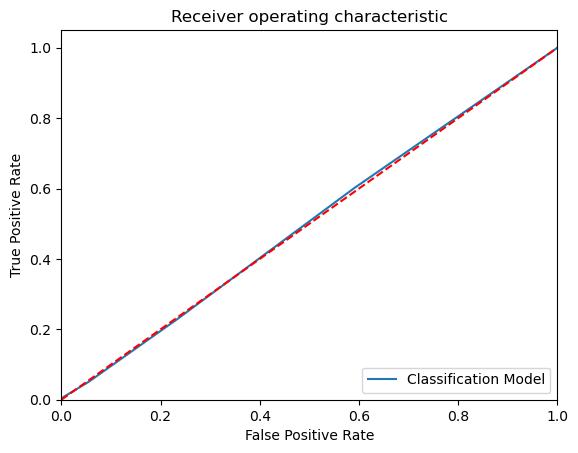

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[   1  413]
 [   1 2498]]
Outcome values : 
 1 413 1 2498
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.68      0.50      0.46      2913
weighted avg       0.81      0.86      0.79      2913

Accuracy : 85.8 %
Precision : 50.0 %
Recall : 0.2 %
F1 Score : 0.005
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : 0.027
roc_auc_score: 0.501


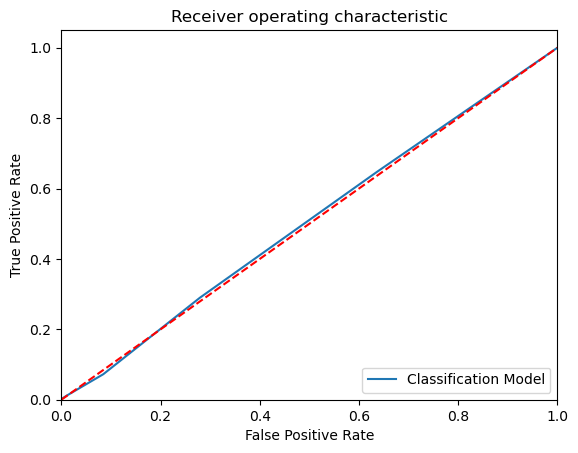

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[   1  413]
 [   6 2493]]
Outcome values : 
 1 413 6 2493
Classification report : 
               precision    recall  f1-score   support

           1       0.14      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.50      0.50      0.46      2913
weighted avg       0.76      0.86      0.79      2913

Accuracy : 85.6 %
Precision : 14.3 %
Recall : 0.2 %
F1 Score : 0.005
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.0 %
MCC : 0.0
roc_auc_score: 0.5


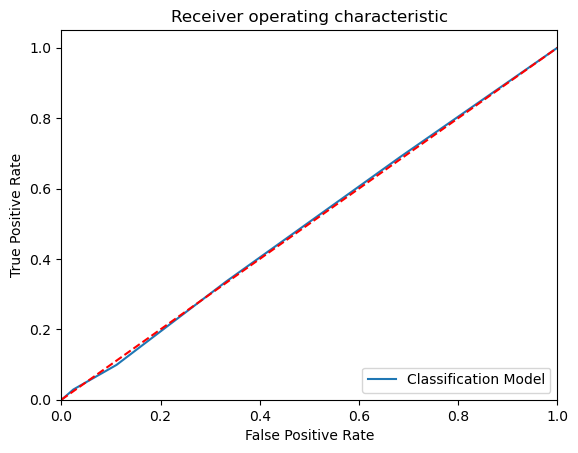

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


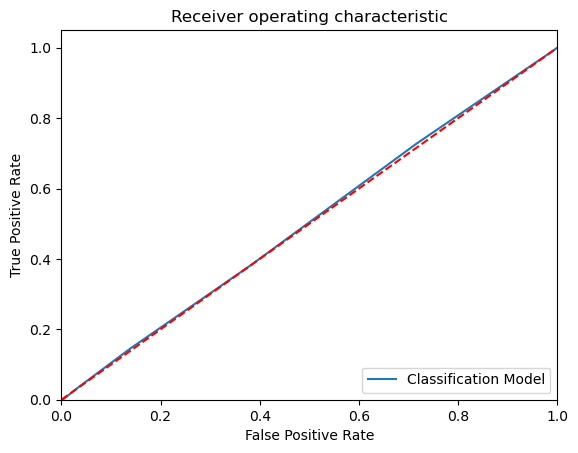

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[   0  414]
 [   4 2495]]
Outcome values : 
 0 414 4 2495
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.7 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 49.9 %
MCC : -0.015
roc_auc_score: 0.499


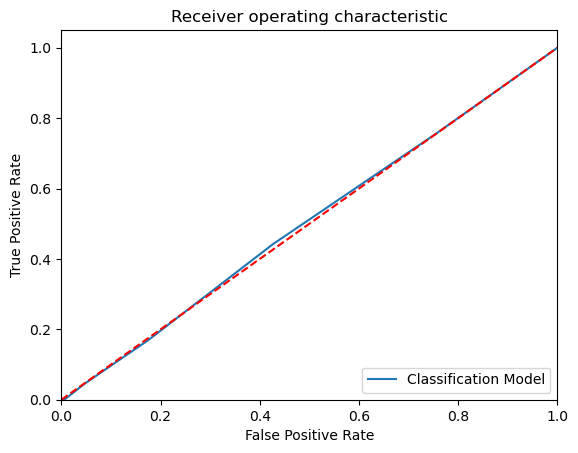

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[   0  414]
 [   2 2497]]
Outcome values : 
 0 414 2 2497
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.7 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : -0.011
roc_auc_score: 0.5


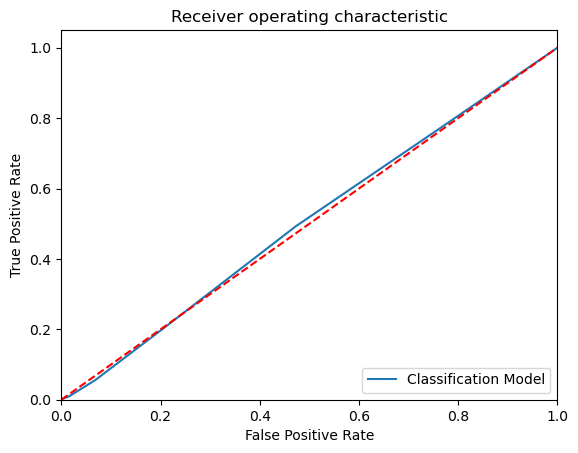

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[   0  414]
 [   2 2497]]
Outcome values : 
 0 414 2 2497
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.7 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : -0.011
roc_auc_score: 0.5


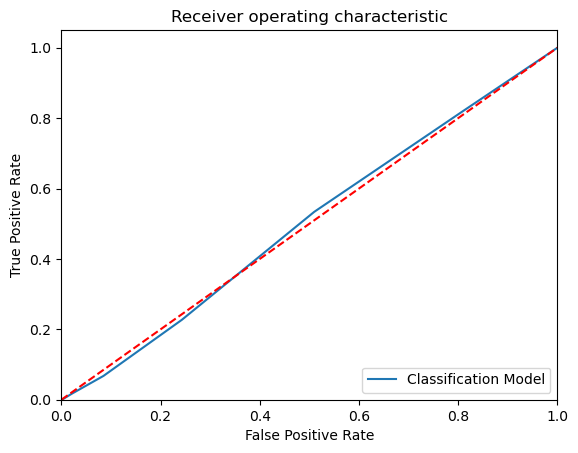

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


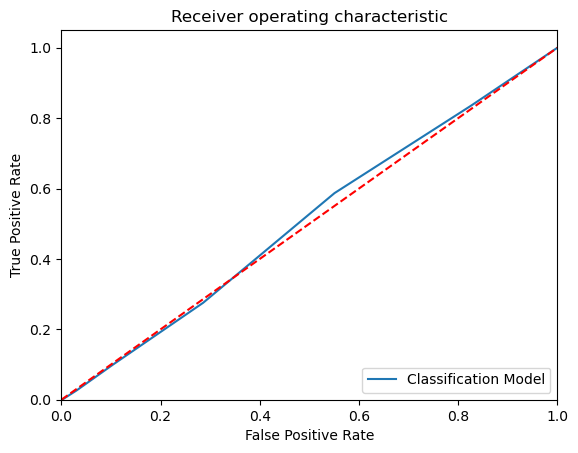

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


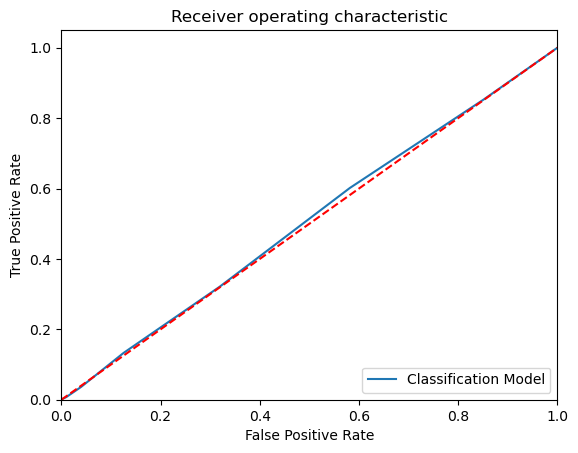

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


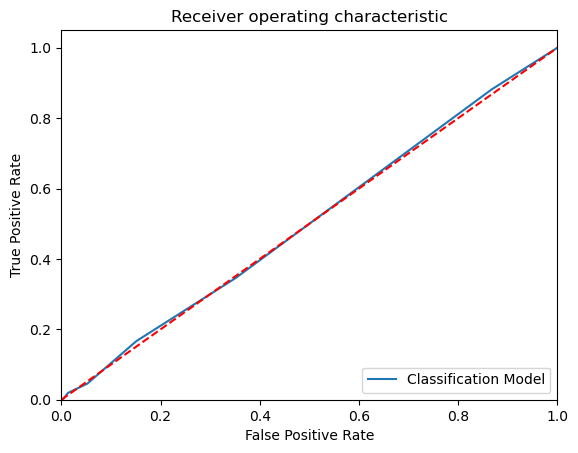

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[   0  414]
 [   1 2498]]
Outcome values : 
 0 414 1 2498
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.008
roc_auc_score: 0.5


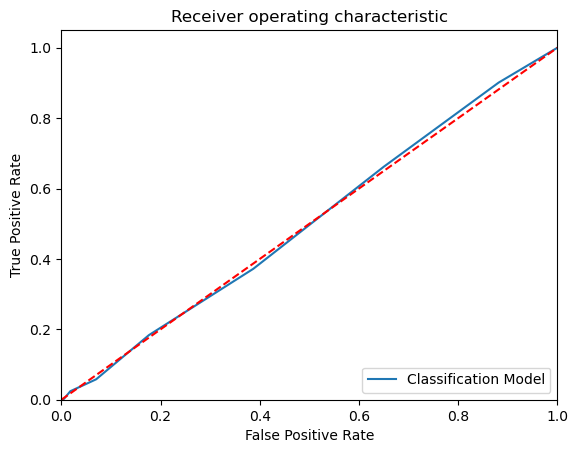

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


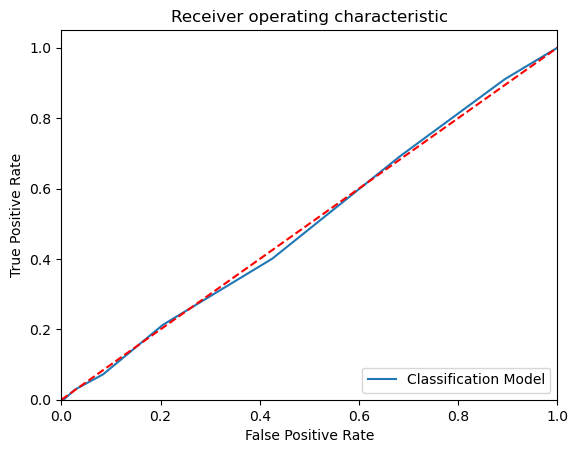

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


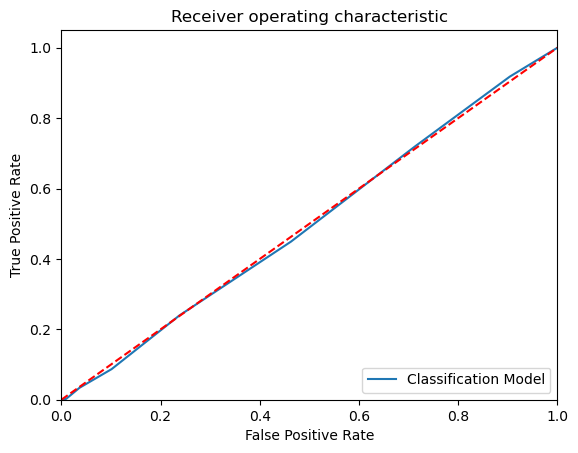

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[   0  414]
 [   0 2499]]
Outcome values : 
 0 414 0 2499
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913

Accuracy : 85.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


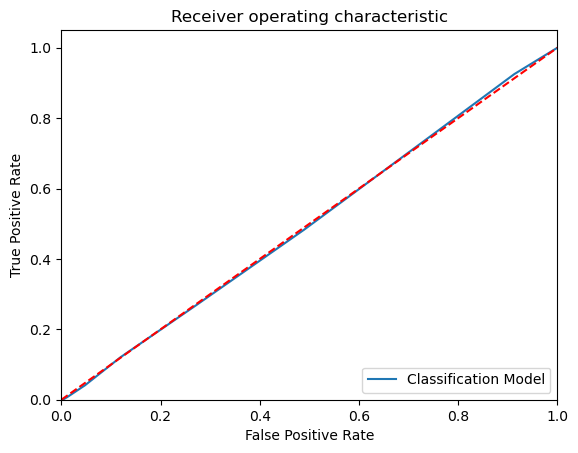

In [25]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [26]:
#to display all KNN results & to find k value
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,55,359,304,2195,0.772,0.153,0.133,0.142,0.878,0.012,0.505601,0.506
1,KNeighborsClassifier(n_neighbors=2),2,6,408,40,2459,0.846,0.130,0.014,0.026,0.984,-0.004,0.499243,0.499
2,KNeighborsClassifier(n_neighbors=3),3,25,389,105,2394,0.830,0.192,0.060,0.092,0.958,0.031,0.509185,0.509
3,KNeighborsClassifier(n_neighbors=4),4,4,410,17,2482,0.853,0.190,0.010,0.018,0.993,0.012,0.501430,0.501
4,KNeighborsClassifier(),5,7,407,40,2459,0.847,0.149,0.017,0.030,0.984,0.002,0.500451,0.500
5,KNeighborsClassifier(n_neighbors=6),6,1,413,3,2496,0.857,0.250,0.002,0.005,0.999,0.011,0.500607,0.500
6,KNeighborsClassifier(n_neighbors=7),7,3,411,9,2490,0.856,0.250,0.007,0.014,0.996,0.020,0.501822,0.501
7,KNeighborsClassifier(n_neighbors=8),8,1,413,1,2498,0.858,0.500,0.002,0.005,1.000,0.027,0.501008,0.501
8,KNeighborsClassifier(n_neighbors=9),9,1,413,6,2493,0.856,0.143,0.002,0.005,0.998,0.000,0.500007,0.500
9,KNeighborsClassifier(n_neighbors=10),10,0,414,0,2499,0.858,NaN,0.000,0.000,1.000,NaN,0.500000,0.500


# CLASSIFICATION ALGORITHM

In [27]:
#load the results file for comparison of different algorithmsCA_result=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults.csv",header=0)
CA_result_bk=CA_result.copy()
CA_result.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  91  323]
 [ 516 1983]]
Outcome values : 
 91 323 516 1983
Classification report : 
               precision    recall  f1-score   support

           1       0.15      0.22      0.18       414
           0       0.86      0.79      0.83      2499

    accuracy                           0.71      2913
   macro avg       0.50      0.51      0.50      2913
weighted avg       0.76      0.71      0.73      2913

Accuracy : 71.2 %
Precision : 15.0 %
Recall : 22.0 %
F1 Score : 0.178
Specificity or True Negative Rate : 79.4 %
Balanced Accuracy : 50.7 %
MCC : 0.011
roc_auc_score: 0.507


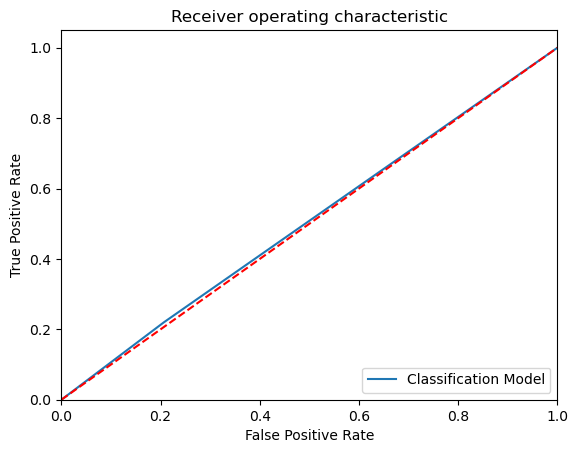

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[   2  412]
 [   5 2494]]
Outcome values : 
 2 412 5 2494
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.00      0.01       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.57      0.50      0.47      2913
weighted avg       0.78      0.86      0.79      2913

Accuracy : 85.7 %
Precision : 28.6 %
Recall : 0.5 %
F1 Score : 0.01
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.1 %
MCC : 0.02
roc_auc_score: 0.501


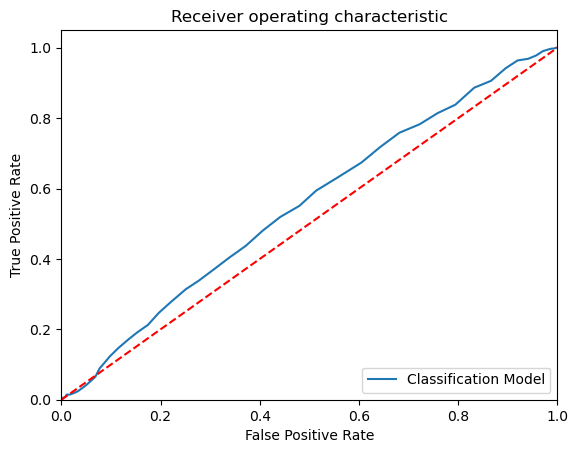

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[   3  411]
 [  24 2475]]
Outcome values : 
 3 411 24 2475
Classification report : 
               precision    recall  f1-score   support

           1       0.11      0.01      0.01       414
           0       0.86      0.99      0.92      2499

    accuracy                           0.85      2913
   macro avg       0.48      0.50      0.47      2913
weighted avg       0.75      0.85      0.79      2913

Accuracy : 85.1 %
Precision : 11.1 %
Recall : 0.7 %
F1 Score : 0.014
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 49.8 %
MCC : -0.009
roc_auc_score: 0.499


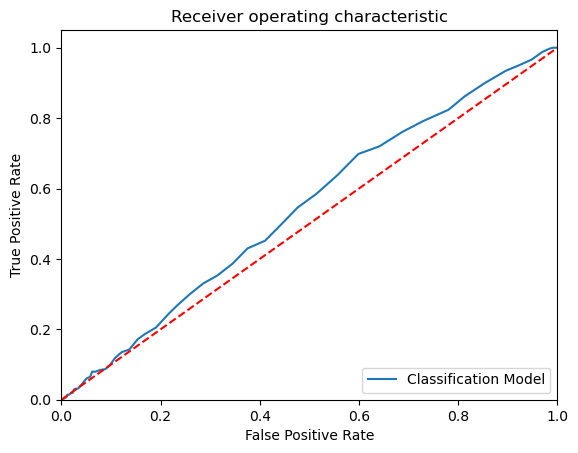

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[   7  407]
 [  51 2448]]
Outcome values : 
 7 407 51 2448
Classification report : 
               precision    recall  f1-score   support

           1       0.12      0.02      0.03       414
           0       0.86      0.98      0.91      2499

    accuracy                           0.84      2913
   macro avg       0.49      0.50      0.47      2913
weighted avg       0.75      0.84      0.79      2913

Accuracy : 84.3 %
Precision : 12.1 %
Recall : 1.7 %
F1 Score : 0.03
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 49.8 %
MCC : -0.009
roc_auc_score: 0.498


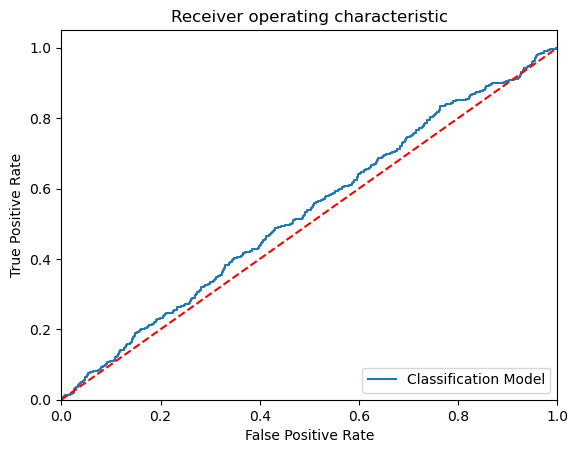

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[   1  413]
 [   1 2498]]
Outcome values : 
 1 413 1 2498
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.00      0.00       414
           0       0.86      1.00      0.92      2499

    accuracy                           0.86      2913
   macro avg       0.68      0.50      0.46      2913
weighted avg       0.81      0.86      0.79      2913

Accuracy : 85.8 %
Precision : 50.0 %
Recall : 0.2 %
F1 Score : 0.005
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : 0.027
roc_auc_score: 0.501


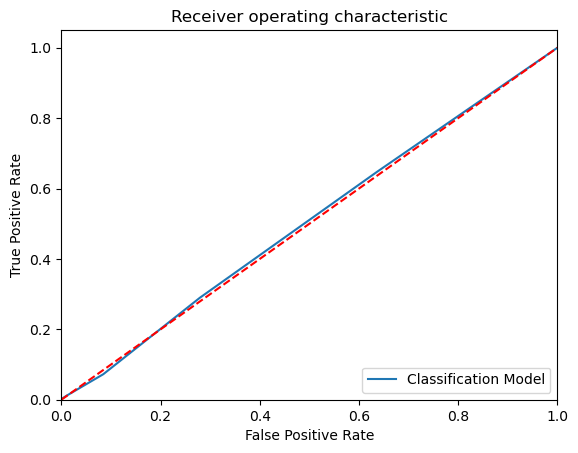

-----------------------------------------------------------------------------------------------------


In [34]:

# Build the Calssification models and compare the results

#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

#ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=8)
ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)
ModelSVM = SVC(kernel='Gaussian', random_state = 42, class_weight='balanced', probability=True)


# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ ModelDC, ModelRF, ModelET, ModelGNB,ModelKNN]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    CA_result = CA_result.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>




In [29]:
#display the comparison results
CA_result.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,DecisionTreeClassifier(),97,317,533,1966,0.708,0.154,0.234,0.186,0.787,0.018,0.510507,0.511
1,"(DecisionTreeClassifier(max_features='auto', r...",2,412,16,2483,0.853,0.111,0.005,0.009,0.994,-0.007,0.499214,0.500
2,"(ExtraTreeClassifier(random_state=4197207), Ex...",2,412,17,2482,0.853,0.105,0.005,0.009,0.993,-0.009,0.499014,0.499
3,GaussianNB(),7,407,51,2448,0.843,0.121,0.017,0.030,0.980,-0.009,0.498250,0.498
4,KNeighborsClassifier(n_neighbors=8),1,413,1,2498,0.858,0.500,0.002,0.005,1.000,0.027,0.501008,0.501


In [30]:
#display the predicted results using efficient algorithm(here,Extra Trees)
Results = pd.DataFrame({'Target_A':y_test, 'Target_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal =CDdata_BK.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Target_A,Target_P
4233,5065626,0,0,1,0,0,0,0,0,2,21,274500.0,58.303730,7.794821,Working,Higher education,Married,House / apartment,Accountants,0,0,0
2729,5041773,0,1,0,1,1,0,0,3,5,39,135000.0,37.030192,12.260348,Working,Higher education,Married,House / apartment,Core staff,0,0,0
5963,5091929,0,1,0,0,0,0,0,0,2,55,135000.0,49.821694,1.798805,Working,Secondary / secondary special,Married,House / apartment,Other,0,0,0
2177,5036511,0,1,0,1,1,0,0,0,1,3,270000.0,26.530319,7.570313,Working,Incomplete higher,Single / not married,With parents,Managers,0,0,0
1989,5033888,1,1,1,1,1,0,0,0,2,22,135000.0,25.446108,2.967891,Commercial associate,Higher education,Civil marriage,House / apartment,Sales staff,0,0,0
